# TP2 Arbres de décision

## Importation des librairies

In [146]:
import numpy as np					        # Pour la manipulation de tableaux
import pandas as pd					        # Pour l’importation des données
import matplotlib.pyplot as plt				# Pour l’affichage de l’arbre
import os							        # Pour le répertoire par défaut

## Répertoire par défaut (à modifier)

In [147]:
os.chdir('C:\\INFO\\R4.04 Optimisation')

## Importation du fichier exemple.csv

In [148]:
exemple = pd.read_table('Exemple.csv', sep = ';', decimal = ',', encoding = 'ANSI')
exemple.dtypes

X1    float64
X2     object
X3     object
Y       int64
dtype: object

In [149]:
exemple.head()

,X1,X2,X3,Y
0,27.4,Bayonne,Très Bien,1
1,30.8,Anglet,Assez Bien,1
2,NaN,Anglet,Bien,0
3,24.7,Anglet,Bien,0
4,24.7,Anglet,NaN,0


# Préparation des données - Contraintes

## Première contrainte : pas de valeur manquante
S’il y en a, une méthode classique est de les remplacer : on parle d’imputation.  
Cette imputation peut se faire par la moyenne, la médiane, la valeur modale (la plus fréquente)…

### Détection des valeurs manquantes
la méthode **isna()** permet de vérifier l'existence de données manquantes

In [150]:
exemple.isna().head()

,X1,X2,X3,Y
0,False,False,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,False,True,False


Plus synthétiquement, nous pouvons sommer sur les colonnes (True --> 1, False --> 0)

In [151]:
exemple.isna().sum()

X1    1
X2    0
X3    1
Y     0
dtype: int64

Il y a donc une valeur manquante dans la variable X1 (quantitative) et une dans la variable X2 (qualitative).   

### Variable X1 quantitative : imputation par la moyenne
Nous aurions aussi pu utiliser la médiane ou le mode. 

#### Calculs de la moyenne et du mode 

In [152]:
exemple['X1'].mean()

26.765306122448976

In [153]:
exemple['X1'].median()

26.3

#### Imputation par la moyenne : fillna()

In [154]:
exemple['X1']=exemple['X1'].fillna(exemple['X1'].mean())

In [155]:
exemple.isna().sum()

X1    0
X2    0
X3    1
Y     0
dtype: int64

### Variable X3 qualitative : imputation par le mode
Attention, il peut y avoir plusieurs valeurs modales, c'est la raison pour laquelle, la méthode **mode()** renvoie une Serie.  
Dans l'exemple de la variable X3, la série n'a qu'une valeur ('Bien'), il n'y a qu'une valeur modale. 

In [156]:
exemple['X3'].mode()

0    Bien
Name: X3, dtype: object

In [157]:
type(exemple['X3'].mode())

pandas.core.series.Series

#### Imputation par le mode : fillna()

In [158]:
exemple['X3']=exemple['X3'].fillna(exemple['X3'].mode()[0])

In [159]:
exemple.isna().sum()

X1    0
X2    0
X3    0
Y     0
dtype: int64

In [160]:
exemple.head()

,X1,X2,X3,Y
0,27.400000,Bayonne,Très Bien,1
1,30.800000,Anglet,Assez Bien,1
2,26.765306,Anglet,Bien,0
3,24.700000,Anglet,Bien,0
4,24.700000,Anglet,Bien,0


Avant de continuer, copie profonde de exemple dans exemple_num

In [161]:
exemple_num = exemple.copy(deep = True)

## Deuxième contrainte : les données doivent se présenter sous la forme d'un tableau de nombre (array numpy)
Ce qui signifie :
* Que les modalités des variables qualitatives doivent être recodées de façon **numérique**
* Que le DataFrame des **variables explicatives** doit être transformé en **tableau numpy** (array numpy)

### Recodage des modalités de X2 et X3 sous forme numérique

Pour renommer des modalités, on utiliser des dictionnaires de correspondance.  
**Pour la variable X2 :**

In [162]:
modalitesX2 = exemple["X2"].unique()
modalitesX2

array(['Bayonne', 'Anglet', 'Biarritz'], dtype=object)

In [163]:
dicX2 = {}
i=1
for i in range(len(modalitesX2)) : 
    dicX2[modalitesX2[i]] = i

dicX2

{'Bayonne': 0, 'Anglet': 1, 'Biarritz': 2}

*Recodage avec replace*

In [164]:
exemple_num['X2'].replace(dicX2, inplace = True)

In [166]:
exemple_num.head()

,X1,X2,X3,Y
0,27.400000,0,Très Bien,1
1,30.800000,1,Assez Bien,1
2,26.765306,1,Bien,0
3,24.700000,1,Bien,0
4,24.700000,1,Bien,0


**Pour la variable X3**

In [167]:
modalitesX3 = exemple_num["X3"].unique()
modalitesX3

array(['Très Bien', 'Assez Bien', 'Bien'], dtype=object)

In [168]:
dicX3 = {}
i=1
for i in range(len(modalitesX3)) : 
    dicX3[modalitesX3[i]] = i



In [169]:
exemple_num['X3'].replace(dicX3, inplace = True)

In [170]:
exemple_num.head()

,X1,X2,X3,Y
0,27.400000,0,0,1
1,30.800000,1,1,1
2,26.765306,1,2,0
3,24.700000,1,2,0
4,24.700000,1,2,0


### Transformation du DataFrame des **variables explicatives** en Tableau Numpy

In [171]:
explicatives = exemple_num.iloc[:,0:3].values 
explicatives[1:5,:]    # affichage des 5 premières lignes du tableau

array([[30.8       ,  1.        ,  1.        ],
       [26.76530612,  1.        ,  2.        ],
       [24.7       ,  1.        ,  2.        ],
       [24.7       ,  1.        ,  2.        ]])

## Création de la cible
Il n'est pas nécessaire, pour la cible, que ses modalités soient recodées **numériquement**

In [172]:
cible = exemple['Y']

# Paramétrage et création de l’arbre
Avec, au préalable, l'importation des fonctions **DecisionTreeClassifier** et **plot_tree** du module **tree** de **sklearn** : 

In [173]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

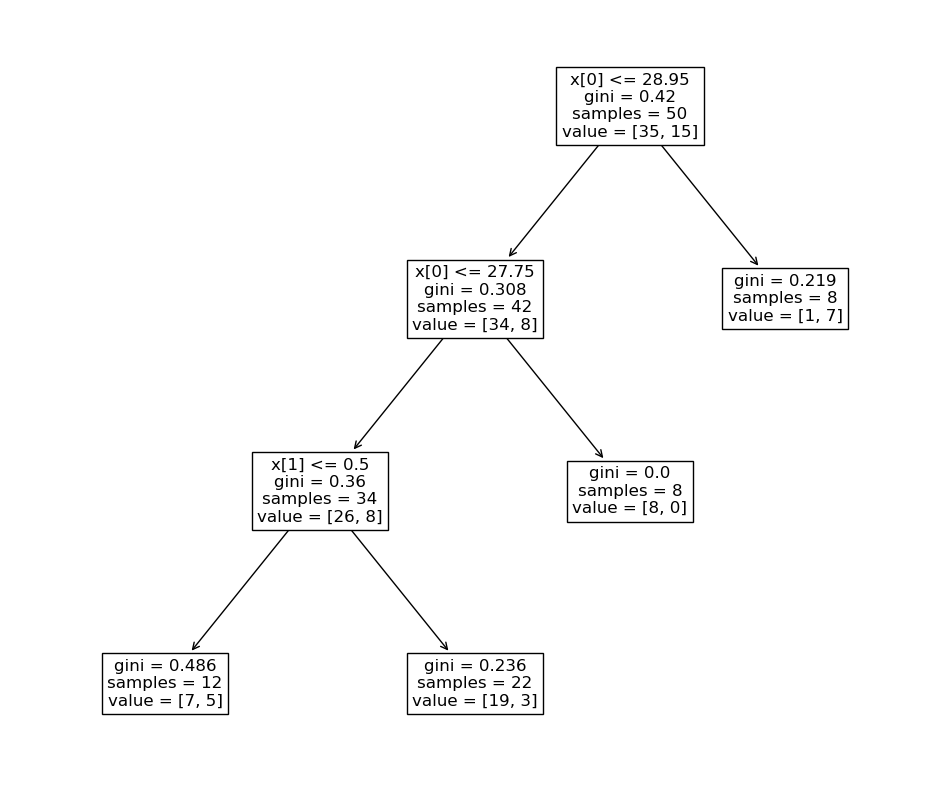

In [174]:
#Paramétrage de l’arbre
#Profondeur max : 3, taille minimum des feuilles : 5
class_arbre = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=5)

#Calcul de l’arbre dans digit_tree
digit_tree = class_arbre.fit(explicatives, cible)

#Visualisation de l’arbre
plt.figure(figsize = (12,10))
tree.plot_tree(digit_tree, fontsize = 12)
plt.show()

### Amélioration

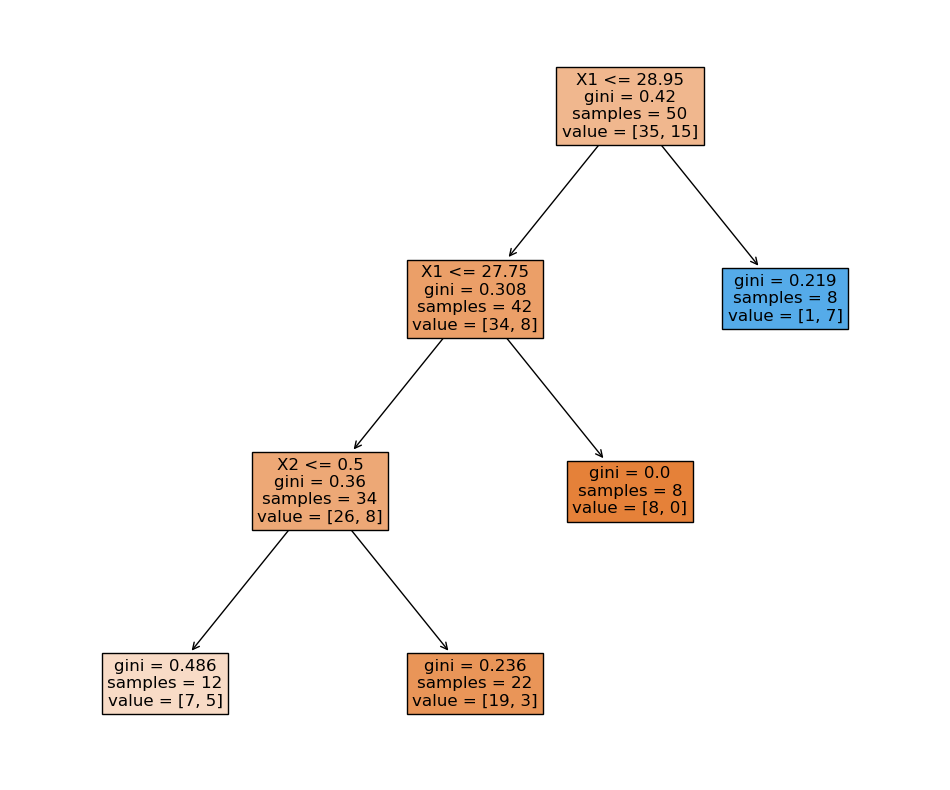

In [175]:
nomvar = list(exemple.columns[0:3])

#Visualisation de l’arbre
plt.figure(figsize = (12,10))
tree.plot_tree(digit_tree, fontsize = 12, filled=True, feature_names= nomvar)
plt.show()

# Attention, par cette méthode, les variables qualitatives **nominales** ne sont pas correctement traitées
En effet, les **modalités** ne peuvent être regroupées que par valeurs consécutives, comme s’il s’agissait de variables qualitatives **ordinales**.  
Une solution est d’associer à chaque variable nominale autant de variables binaires que de modalités. 
Nous utilisons, pour cela, la méthode **get_dummies()**

In [176]:
ex = pd.get_dummies(exemple, columns = ['X2','X3'])
ex.head()

,X1,Y,X2_Anglet,X2_Bayonne,X2_Biarritz,X3_Assez Bien,X3_Bien,X3_Très Bien
0,27.400000,1,False,True,False,False,False,True
1,30.800000,1,True,False,False,True,False,False
2,26.765306,0,True,False,False,False,True,False
3,24.700000,0,True,False,False,False,True,False
4,24.700000,0,True,False,False,False,True,False


In [189]:
explicatives2 = ex.iloc[:,[0,2,3,4,5,6,7]] 

Index(['X1', 'X2_Anglet', 'X2_Bayonne', 'X2_Biarritz', 'X3_Assez Bien',
       'X3_Bien', 'X3_Très Bien'],
      dtype='object')

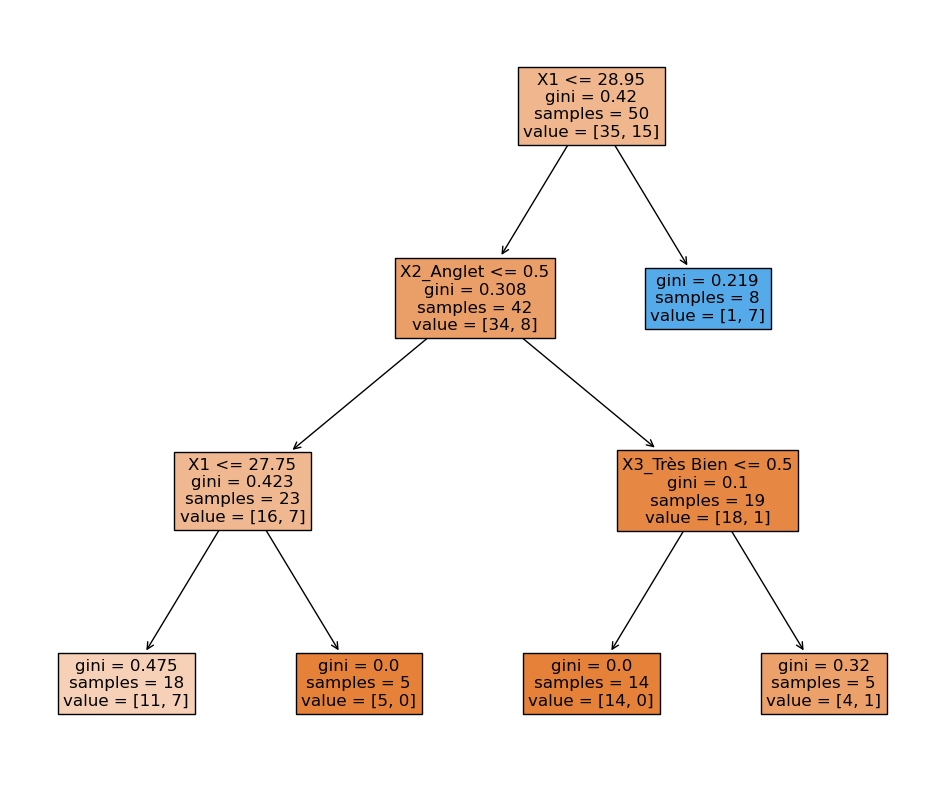

In [193]:
#Calcul de l’arbre dans digit_tree
digit_tree = class_arbre.fit(explicatives2, cible)
nomvar = list(ex.columns[[0,2,3,4,5,6,7]])

#Visualisation de l’arbre
plt.figure(figsize = (12,10))
tree.plot_tree(digit_tree, fontsize = 12, filled=True, feature_names= nomvar)
plt.show()

# Sujet du TP2

# Partie I
Les données portent sur les variétés rouges et blanches du vin portugais « Vinho Verde ».  
*Référence : Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.*  
Vous commencerez par travailler sur le fichier **winequality-red-alc.csv** concernant les variétés « rouge » du Vinho Verde.  
Les variables que nous avons retenues dans ce fichier (lire avec attention) :  
* **citric acid :** acide citrique – variable quantitative – de  0 à 1,66	
* **residual sugar :** sucre résiduel – variable quantitative – de 0,6 à 65,8
* **sulphates :** sulfates – variable quantitative – de 0,22 à 1,08	
* **alcohol :** degré d’alcool -  variable qualitative – modalités :  « <10 », « [10,11[ » ,  « [11,12[ », « >12 »
* **quality :** score d’évaluation de la qualité du vin – variable quantitative – de 3 à 8
* **avis :** directement lié au score précédent (quality) – variable qualitative – modalités : bon (si quality >6), pas bon (sinon)  
Nous allons construire un **arbre de décision** à partir de ces données
Les variables explicatives sont les variables **citric acid, residual sugar, sulphates, alcohol.** 
La variable cible est **avis**

## Importer les données sous Python et réaliser un arbre de décision, la variable cible étant la variable avis. 

*On pourra vérifier, sous Excel ou avec Python, les calculs effectués sur les premiers noeuds*

# Partie II

Les données portent maintenant sur les employés d’une entreprise : **employes5A.csv**  
Les variables qualitatives ont déjà été codées numériquement.
### Liste des variables : 
* **Attrition :** variable cible, indiquant si l’employé a quitté (« oui ») volontairement l’entreprise
* **Age :** âge de l’employé	
* **Deplacements :** variable qualitative relative aux déplacements professionnels de l’employé
0 : Pas de déplacement professionnel
1 : Peu de déplacements professionnels
2 : Déplacements professionnels fréquents
* **Departement :** variable qualitative relative au service dans lequel travaille l’employé
1 : Ressources humaines
2 : Recherche & Développement
3 : Service commercial
* **DistanceDomicile :** variable quantitative, indiquant la distance domicile/travail de l’employé
* **NiveauFormation :** variable qualitative correspondant au niveau d’étude de l’employé
1 : Brevet
2 : Bac
3 : Licence/Bachelor
4 : Master
5 : Doctorat
* **Genre :** variable qualitative relative au genre de l’employé
1 : Homme
2 : Femme
* **StatutMarital :** situation de l’employé
1 : Célibataire
2 : Divorcé
3 : Marié
* **AnnesDsEnt :** nombre d’années dans l’entreprise, de l’employé
* **AnneesPromo :** nombre d’années depuis la dernière promotion

## Importer les données sous Python et réaliser un premier arbre de décision de profondeur 3 en faisant attention à traiter correctement les variables qualitatives nominales. 